<a href="https://colab.research.google.com/github/SJhawar1010/LLM/blob/main/Satyam_554_LLM_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the fine-tuned model and tokenizer.

In [1]:
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.applications import ResNet50
text_tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
text_model=TFBertModel.from_pretrained('bert-base-uncased')
image_model=ResNet50(weights='imagenet', include_top=False, pooling='avg')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Preprocessing Text

In [2]:
import tensorflow as tf
text="My name is Satyam Jhawar and I am pursuing MSc in AI and ML at CHRIST (Deemed to be University)"
inputs = text_tokenizer(text, return_tensors='tf', truncation=True, padding=True)
outputs = text_model(inputs)
text_embedding = outputs.last_hidden_state[:, 0, :]

### Preprocessing Image

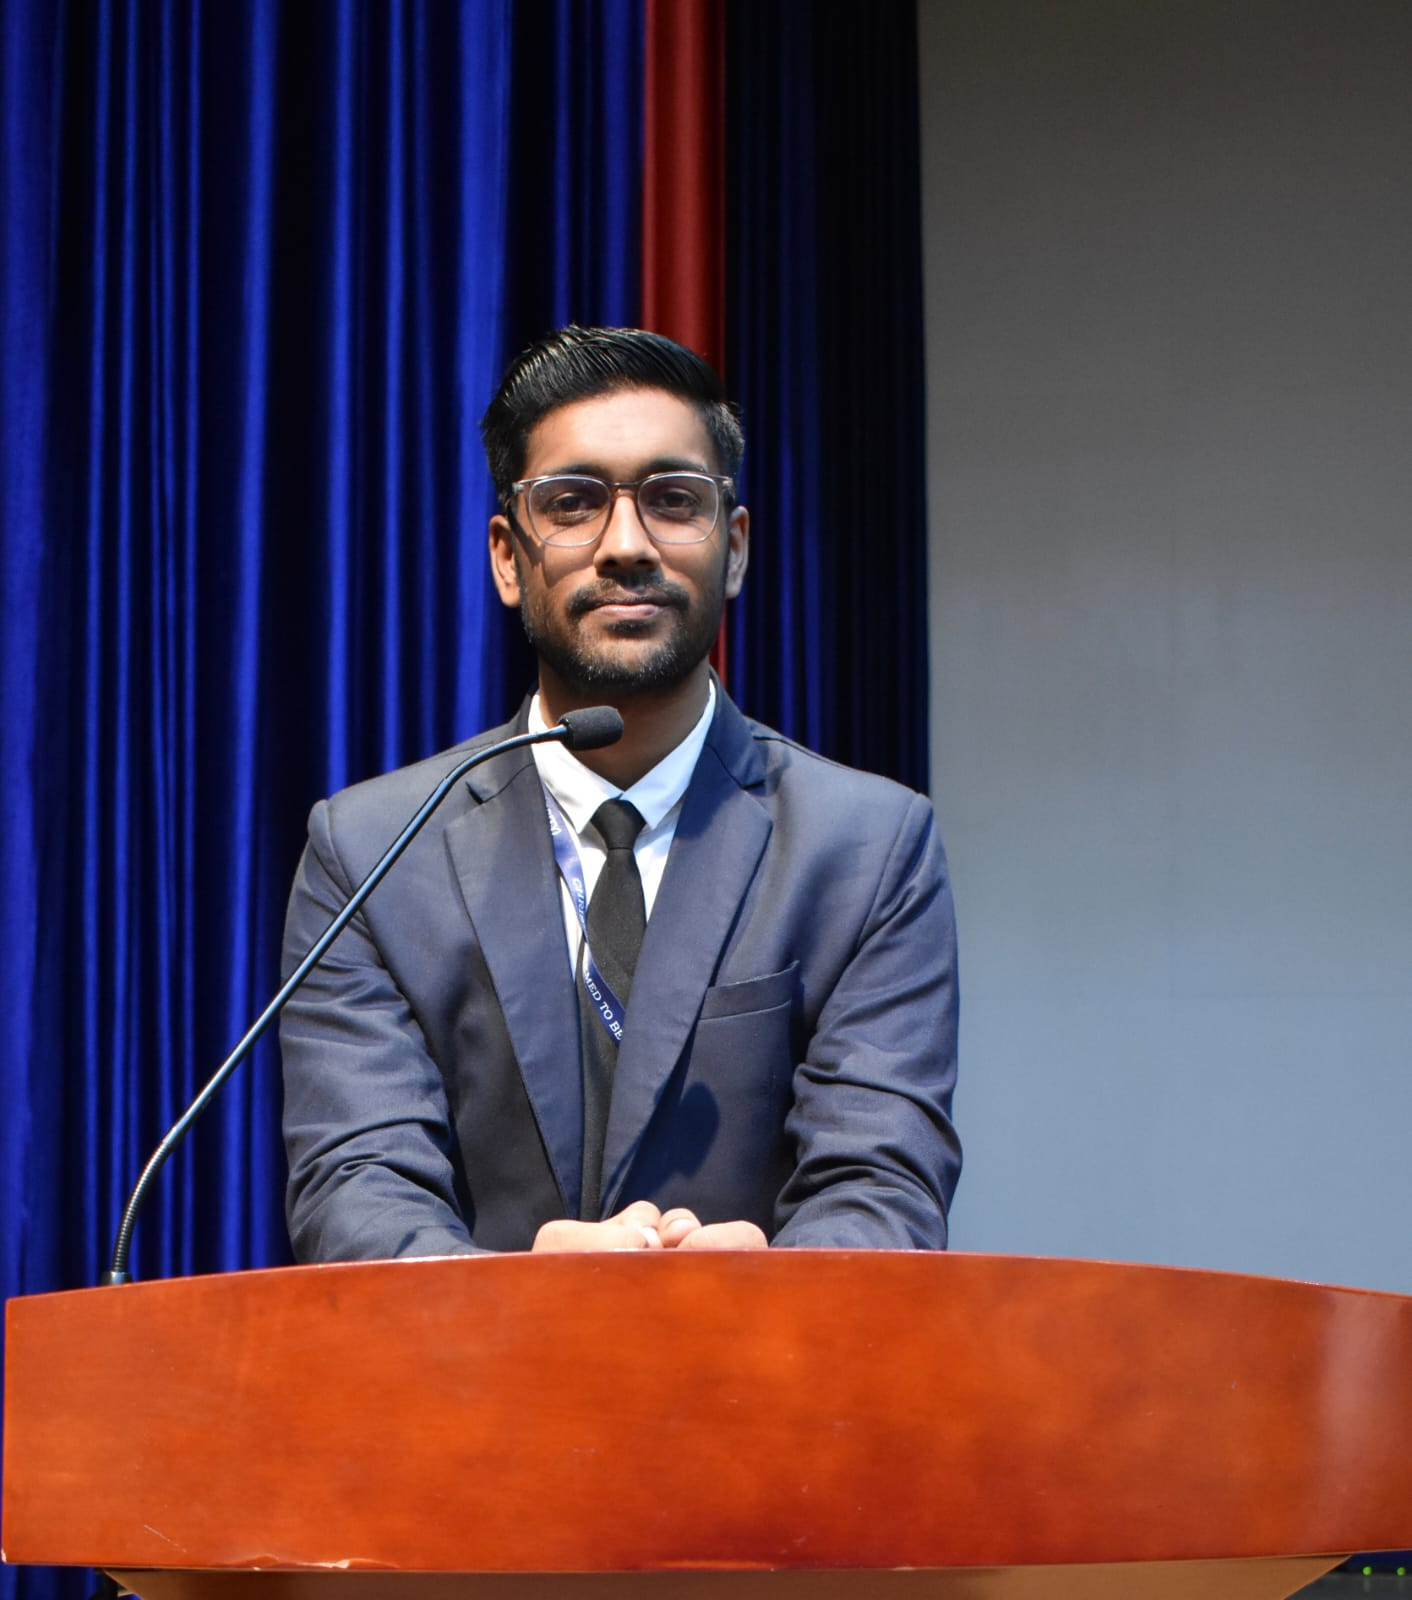

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/satyam1.jpg', target_size=(224, 224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)
img_array=preprocess_input(img_array)
img_embedding=image_model(img_array)

### Combine Text and Image Embedding

In [4]:
combined_embedding=tf.concat([text_embedding, img_embedding], axis=1)
print("Text Embedding Shape:",text_embedding.shape)
print("Image Embedding Shape:",img_embedding.shape)
print("Combined Embedding Shape:",combined_embedding.shape)

Text Embedding Shape: (1, 768)
Image Embedding Shape: (1, 2048)
Combined Embedding Shape: (1, 2816)
